In [1]:
#importing the required modules
import seaborn as sns
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
from tqdm import tqdm, notebook
notebook.tqdm().pandas()

0it [00:00, ?it/s]

In [3]:
# Small adjustments to default style of plots, making sure it's readable and colorblind-friendly everywhere
plt.style.use('seaborn-colorblind')
plt.rcParams.update({'font.size' : 14,
                     'figure.figsize':(25,7)})

Get the path to retrieve data from local folder

#### Using the provided csv file to link qids with meaningful names for speakers metadata

In [4]:
df_lookup = pd.read_csv('wikidata_labels_descriptions_quotebank.csv.bz2',compression = 'bz2',index_col='QID')

## Speakers Aggregation

### Import quotes data

In [5]:
#Retrieve the dataset containing all speakers with the fraction of the colloquial language 
#Import the speakers metadata
#path = r'/Users/jules/kDrive/onedrive/Documents_Onedrive/EPFL/MA3/ADA/Project/Dataset/BIG_SAMPLE/'
#file_path = path+'Sample_2020_classified.json.bz2'

path = r'/Users/jules/kDrive/onedrive/Documents_Onedrive/EPFL/MA3/ADA/Project/Dataset/BIG_SAMPLE/Results_LR/'
file_path = path+'df_quotes_pol_all_classified_2methods.json.bz2'

In [6]:
df_quotes =  pd.read_json(file_path,compression = 'bz2',lines = True)

In [7]:
df_quotes.columns

Index(['quoteID', 'quotation', 'speaker', 'qid_unique', 'date', 'urls', 'p1',
       'p2', 'delta_p', 'year', 'label', 'aliases', 'date_of_birth',
       'nationality', 'gender', 'lastrevid', 'ethnic_group',
       'US_congress_bio_ID', 'occupation', 'party', 'academic_degree', 'id',
       'candidacy', 'type', 'religion', 'age', 'bi_party',
       'colloquial_NaiveBayes', 'colloquial_contractions'],
      dtype='object')

### Import american politic speakers metadata

In [8]:
file_path = path+'df_speakers_pol.json.bz2'
df_speakers_meta =  pd.read_json(file_path,compression = 'bz2',lines = True)

In [9]:
df_quotes

,quoteID,quotation,speaker,qid_unique,date,urls,p1,p2,delta_p,year,...,party,academic_degree,id,candidacy,type,religion,age,bi_party,colloquial_NaiveBayes,colloquial_contractions
0,2015-04-16-012993,"Come, Son, Let Me Tell You A Lie,",Robert Johnson,Q16215328,2015-04-16 12:17:09,[http://mysanantonio.com/entertainment/article...,0.6719,0.2895,0.3824,2015,...,[Q29552],None,Q16215328,None,item,None,46.0,Democrat,informal,0
1,2015-05-09-008197,Everybody grieves in their own way. I just wan...,Robert Johnson,Q16215328,2015-05-09 09:25:48,[http://www.foxbaltimore.com/news/features/top...,0.6130,0.2622,0.3508,2015,...,[Q29552],None,Q16215328,None,item,None,46.0,Democrat,informal,0
2,2015-07-31-011595,But a vast minority of sex assault victims are...,Robert Johnson,Q16215328,2015-07-31 15:21:13,[http://pix11.com/2015/07/31/men-convicted-of-...,0.9152,0.0848,0.8304,2015,...,[Q29552],None,Q16215328,None,item,None,46.0,Democrat,informal,0
3,2015-11-05-133940,We are running major law offices with major re...,Robert Johnson,Q16215328,2015-11-05 07:30:00,[http://www.nydailynews.com/new-york/exclusive...,0.7218,0.2288,0.4930,2015,...,[Q29552],None,Q16215328,None,item,None,46.0,Democrat,informal,0
4,2015-12-23-026592,"I did footings, I did walls. Right now, I'm up...",Robert Johnson,Q16215328,2015-12-23 14:38:25,[http://www.mprnews.org/story/2015/10/23/vikes...,0.7711,0.1818,0.5893,2015,...,[Q29552],None,Q16215328,None,item,None,46.0,Democrat,informal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564653,2020-03-12-051570,People in this area are very in tune with what...,Marge Anderson,Q6760269,2020-03-12 04:29:22,[https://www.recorder.com/b1-Northfield-trash-...,0.8344,0.1656,0.6688,2020,...,None,None,Q6760269,None,item,None,89.0,None,informal,1
564654,2020-03-01-037715,"to help spread facts, not fear.",Sabrina Cervantes,Q27890015,2020-03-01 01:42:05,[https://mynewsla.com/business/2020/02/29/offi...,0.8328,0.1561,0.6767,2020,...,[Q5020399],None,Q27890015,None,item,None,34.0,None,informal,0
564655,2020-03-21-041323,We knew that we needed to do more to protect o...,Luis Alejo,Q6700297,2020-03-21 19:42:48,[https://www.montereyherald.com/2020/03/21/cov...,0.8260,0.1582,0.6678,2020,...,[Q29552],None,Q6700297,None,item,None,47.0,Democrat,informal,0
564656,2020-01-28-083318,the Sheriff has enriched himself,Joel Robideaux,Q6213896,2020-01-28 00:28:26,[https://www.katc.com/news/lafayette-parish/lp...,0.7743,0.2182,0.5561,2020,...,[Q29468],None,Q6213896,None,item,None,59.0,Republican,informal,0


### Group the qi by speaker

In [10]:
#Transform str into 0/1
def replace_binary(string):
    if string == 'formal':
        out = 0
    elif string == 'informal':
        out = 1
    else:
        out = None
        
    return out

df_quotes['colloquial_NaiveBayes']=df_quotes['colloquial_NaiveBayes'].apply(lambda x: replace_binary(x))

In [11]:
df_quotes.columns

Index(['quoteID', 'quotation', 'speaker', 'qid_unique', 'date', 'urls', 'p1',
       'p2', 'delta_p', 'year', 'label', 'aliases', 'date_of_birth',
       'nationality', 'gender', 'lastrevid', 'ethnic_group',
       'US_congress_bio_ID', 'occupation', 'party', 'academic_degree', 'id',
       'candidacy', 'type', 'religion', 'age', 'bi_party',
       'colloquial_NaiveBayes', 'colloquial_contractions'],
      dtype='object')

In [12]:
#Remove Boris Johnson as it can be considered as UK politic instead of US politic
todrop = df_quotes.loc[df_quotes['label']=='Boris Johnson'].index
df_quotes.drop(labels=todrop,axis=0,inplace=True)

In [13]:
def groupby_method(df_quotes,df_speakers_meta,method):
    
    df_grouped = df_quotes.groupby(['qid_unique',method]).size().unstack(fill_value=0).reset_index()
    df_grouped['quotes_number'] = df_grouped[1]+df_grouped[0]
    df_grouped.sort_values(['quotes_number'], ascending=False) 

    # Create also a column (called "fraction") that computes the fraction of colloquial quotes over total quotations. (by speaker)
    df_grouped['fraction']=df_grouped[1]/(df_grouped['quotes_number'])
    df_grouped.reset_index().sort_values(['fraction'], ascending=False)
    df_grouped.reset_index().sort_values(['quotes_number'], ascending=False)
    #Merge with speakers metadata
    df_aggreg = df_grouped.merge(df_speakers_meta,how='inner',left_on='qid_unique', right_on='id')
    df_aggreg=df_aggreg.reset_index().sort_values(['quotes_number'], ascending=False)
    return df_aggreg

In [14]:
df_aggreg_Naive = groupby_method(df_quotes,df_speakers_meta,'colloquial_NaiveBayes')
df_aggreg_contractions = groupby_method(df_quotes,df_speakers_meta,'colloquial_contractions')

## Statistics

### Plot distribution of quotations number per speaker

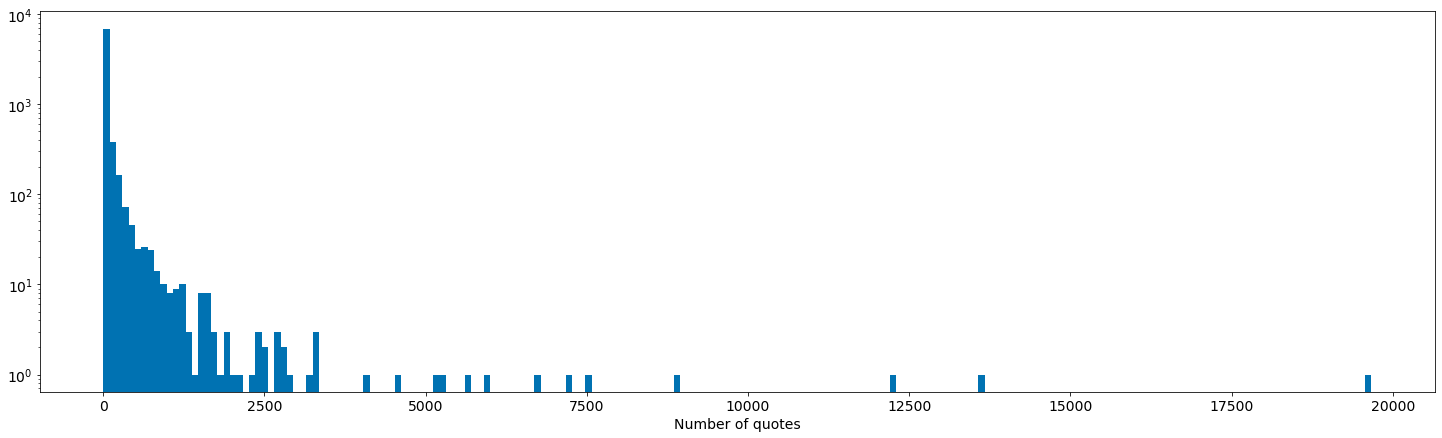

In [15]:
plt.hist(df_aggreg_Naive['quotes_number'],bins=200,log=True);
plt.xlabel('Number of quotes');

Text(0.5, 0, 'Occurrence fraction')

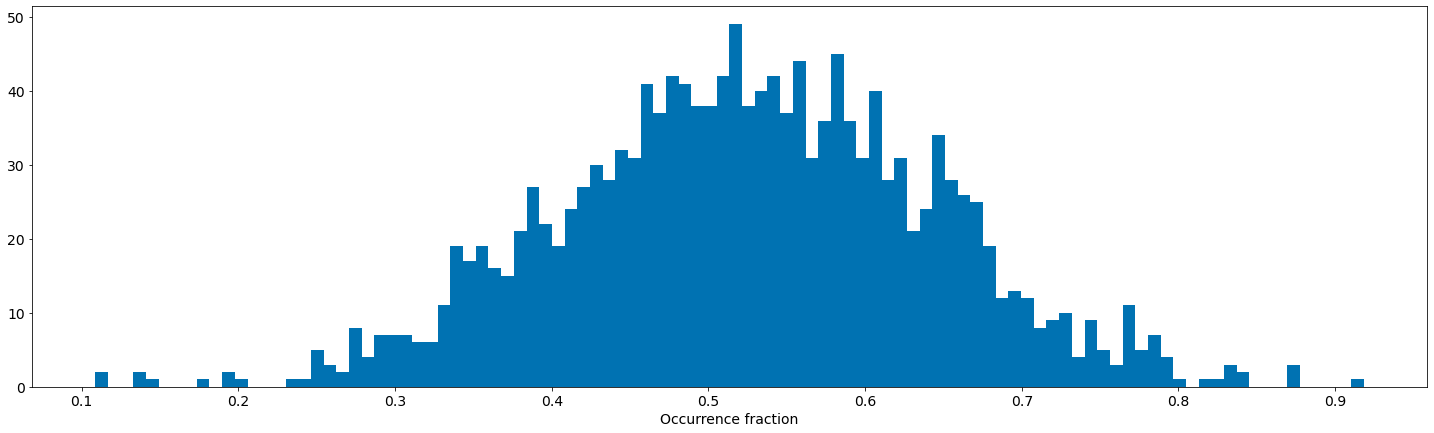

In [16]:
df_plot = df_aggreg_Naive[df_aggreg_Naive['quotes_number']>50]

plt.hist(df_plot['fraction'],bins=100,log=False);
plt.xlabel('Colloquial fraction')
plt.xlabel('Occurrence fraction')

In [17]:
#Keep only speakers who have a number of quotes larger than a specific threshold
thresh = 50 
df_aggreg_Naive_filt = df_aggreg_Naive[df_aggreg_Naive['quotes_number']>thresh]
df_aggreg_contractions_filt =df_aggreg_contractions[df_aggreg_contractions['quotes_number']>thresh]

#Specify the method used in this case 
df_aggreg_Naive_filt['Classification method'] = 'Naive_Bayes'
df_aggreg_contractions_filt['Classification method'] = 'contractions'

#Define a dataframe for plotting with entries for two classification methods
df_plot = pd.concat([df_aggreg_Naive_filt,df_aggreg_contractions_filt])

C:\Users\jules\AppData\Local\Temp/ipykernel_20748/1127354628.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aggreg_Naive_filt['Classification method'] = 'Naive_Bayes'
C:\Users\jules\AppData\Local\Temp/ipykernel_20748/1127354628.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aggreg_contractions_filt['Classification method'] = 'contractions'


### Compute statistics on the colloquial fraction of speaker 

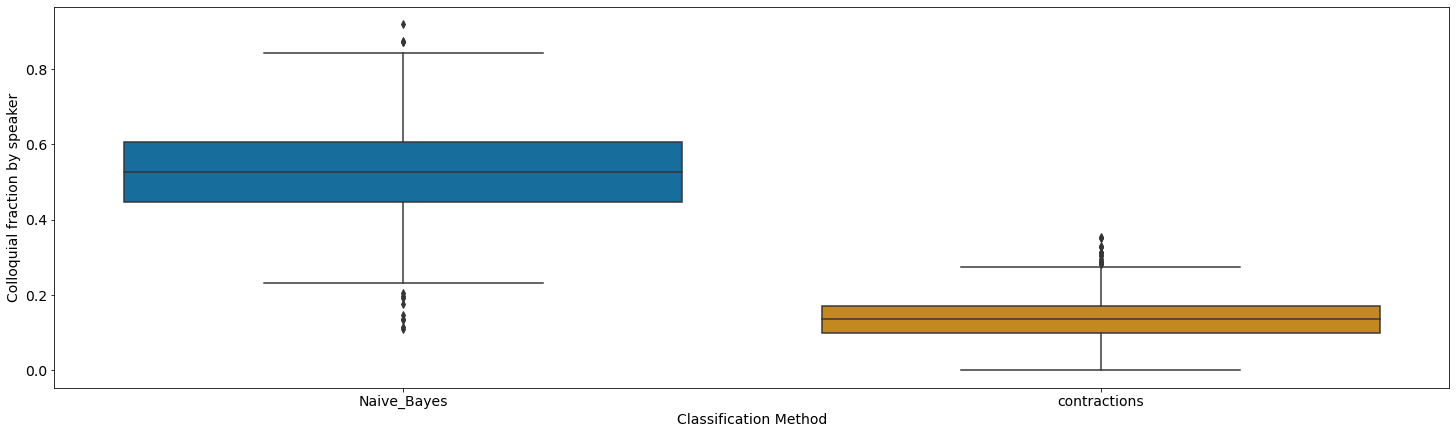

In [18]:
#Build boxplots for two methods
fig,ax =plt.subplots(1,1)
ax=sns.boxplot(x='Classification method',y="fraction",data=df_plot,palette="colorblind",order=['Naive_Bayes','contractions'])
ax.set_xlabel('Classification Method')
ax.set_ylabel('Colloquial fraction by speaker')
path =r'/Users/jules/kDrive/onedrive/Documents_Onedrive/EPFL/MA3/ADA/Project/Figures/'
fig.savefig(path+'fraction_distribution.svg',format = 'svg',bbox_inches='tight')
fig.savefig(path+'fraction_distribution.png',format = 'png',bbox_inches='tight')

### Top 10 speakers per number of quotes

Text(0, 0.5, 'Number of quotes')

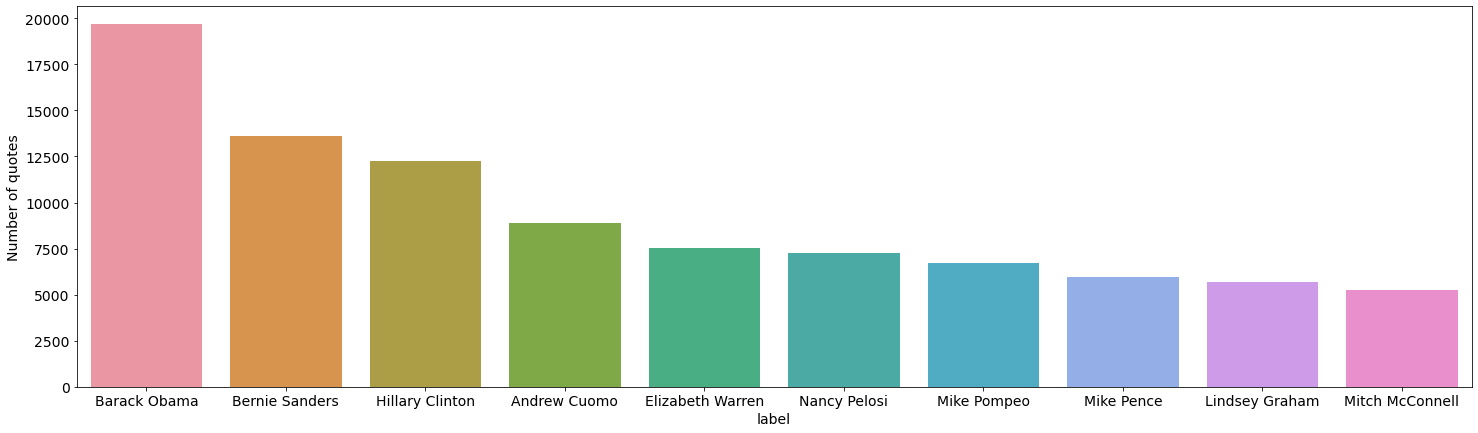

In [21]:
ax = sns.barplot(x="label", y="quotes_number", data=df_plot[:10])
ax.set_ylabel('Number of quotes')

### Colloquial fraction (according the two methods) of 10 most represented speakers

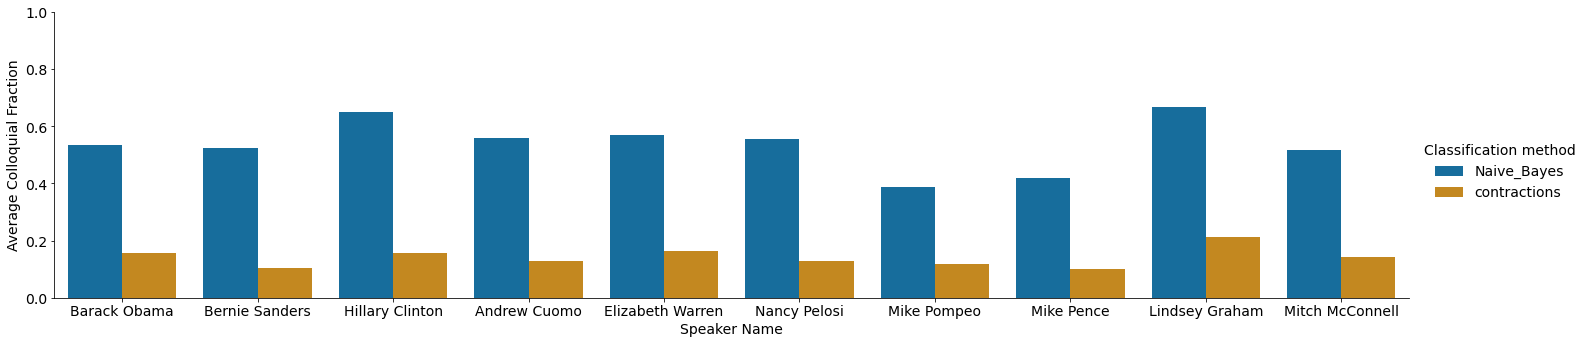

In [25]:
df_plot_top10= pd.concat([df_aggreg_Naive_filt[:10],df_aggreg_contractions_filt[:10]])
ax = sns.catplot(x="label", y="fraction", hue="Classification method",data=df_plot_top10, kind="bar",legend_out=True,palette='colorblind',height=5,aspect=4);
ax.set_axis_labels('Speaker Name', 'Average Colloquial Fraction');
ax.set(ylim=(0, 1))

#Save figures
path =r'/Users/jules/kDrive/onedrive/Documents_Onedrive/EPFL/MA3/ADA/Project/Figures/'
ax.savefig(path+'polAgrregPlot_top10_quotesnumber.svg',format = 'svg',bbox_inches='tight')
ax.savefig(path+'polAgrregPlot_top10_quotesnumber.png',format = 'png',bbox_inches='tight')

In [23]:
df_plot

,index,qid_unique,0,1,quotes_number,fraction,label,aliases,date_of_birth,nationality,...,occupation,party,academic_degree,id,candidacy,type,religion,age,bi_party,Classification method
7133,7133,Q76,9172,10496,19668,0.533659,Barack Obama,"[Barack Hussein Obama II, Barack Obama II, Bar...",-2.654208e+11,[Q30],...,"[Q82955, Q40348, Q15958642, Q28532974, Q372436]",[Q29552],"[Q1765120, Q1540185]",Q76,"[Q3586671, Q45578, Q4226, Q4791768, Q17067714,...",item,"[Q23540, Q1062789, Q960252, Q426316]",60.0,Democrat,Naive_Bayes
3262,3262,Q359442,6449,7149,13598,0.525739,Bernie Sanders,[Bernard Sanders],-8.935488e+11,[Q30],...,"[Q82955, Q1930187, Q154549, Q1622272, Q36180, ...","[Q6542163, Q29552, Q327591, Q327591, Q29552]",[Q1765120],Q359442,None,item,[Q9268],80.0,Democrat,Naive_Bayes
5693,5693,Q6294,4300,7945,12245,0.648836,Hillary Clinton,"[Hillary Rodham Clinton, Hillary Rodham, Hilla...",-7.000992e+11,[Q30],...,"[Q82955, Q40348, Q193391, Q36180, Q18814623, Q...","[Q29552, Q29468]","[Q163727, Q1540185]",Q6294,"[Q699872, Q4791768]",item,[Q33203],74.0,Republican,Naive_Bayes
50,50,Q11673,3904,4982,8886,0.560657,Andrew Cuomo,[Andrew Mark Cuomo],-3.809376e+11,[Q30],...,"[Q40348, Q82955]",[Q29552],[Q1540185],Q11673,"[Q22023432, Q65047185]",item,[Q1841],64.0,Democrat,Naive_Bayes
3395,3395,Q434706,3243,4263,7506,0.567946,Elizabeth Warren,"[Elizabeth Ann Warren, Senator Warren, Elisabe...",-6.478272e+11,[Q30],...,"[Q185351, Q82955, Q37226, Q1622272, Q40348, Q1...",[Q29552],"[Q163727, Q1540185]",Q434706,[Q28220813],item,[Q33203],72.0,Democrat,Naive_Bayes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1517,1517,Q16730078,41,10,51,0.196078,Celia Israel,None,-1.724544e+11,[Q30],...,[Q82955],[Q29552],None,Q16730078,None,item,None,57.0,Democrat,contractions
6581,6581,Q7172112,50,1,51,0.019608,Pete Lopez,None,-2.754432e+11,[Q30],...,[Q82955],[Q29468],None,Q7172112,None,item,None,60.0,Republican,contractions
2762,2762,Q22338,40,11,51,0.215686,Mary Landrieu,[Mary Loretta Landrieu],-4.452192e+11,[Q30],...,[Q82955],[Q29552],None,Q22338,None,item,[Q9592],66.0,Democrat,contractions
4281,4281,Q51754461,45,6,51,0.117647,Gina Ortiz Jones,None,3.498336e+11,[Q30],...,[Q82955],[Q29552],None,Q51754461,None,item,None,40.0,Democrat,contractions


### Top 10 colloquial  speakers 

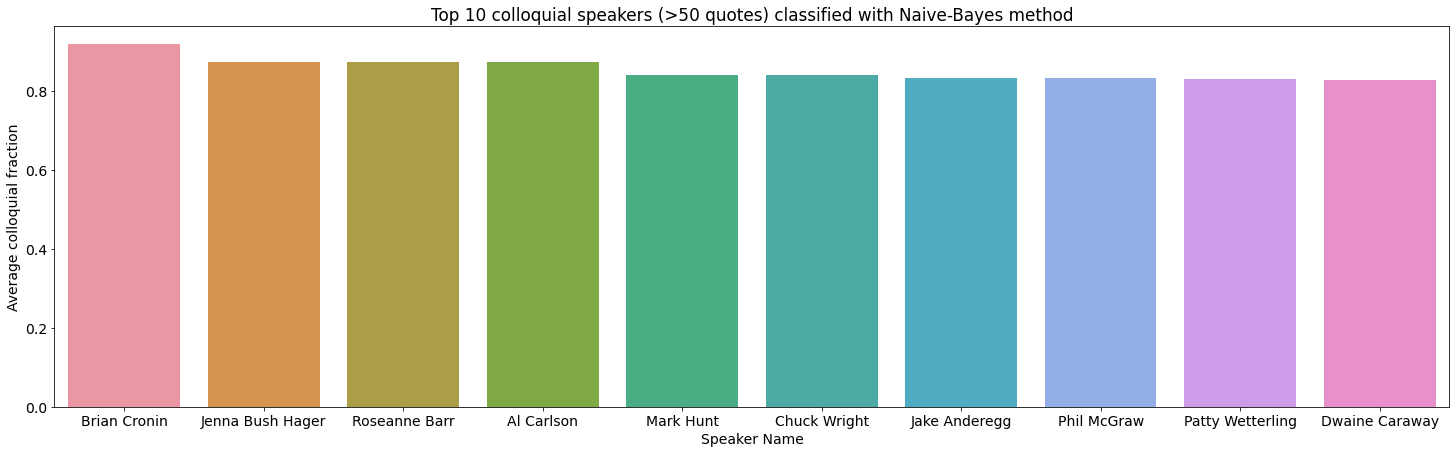

In [135]:
#Consider only speakers that have more than a specific number of quotes
df_plot2=df_aggreg_Naive_filt.reset_index().sort_values(['fraction'], ascending=False)

fig,ax = plt.subplots(1,1)
ax = sns.barplot(x="label", y="fraction", data=df_plot2[:10])
ax.set_xlabel('Speaker Name')
ax.set_ylabel('Average colloquial fraction')
ax.set_title('Top 10 colloquial speakers (>50 quotes) classified with Naive-Bayes method')
path =r'/Users/jules/kDrive/onedrive/Documents_Onedrive/EPFL/MA3/ADA/Project/Figures/'
fig.savefig(path+'polAgrregPlot_top10_Naive.svg',format = 'svg',bbox_inches='tight')
fig.savefig(path+'polAgrregPlot_top10_Naive.png',format = 'png',bbox_inches='tight')

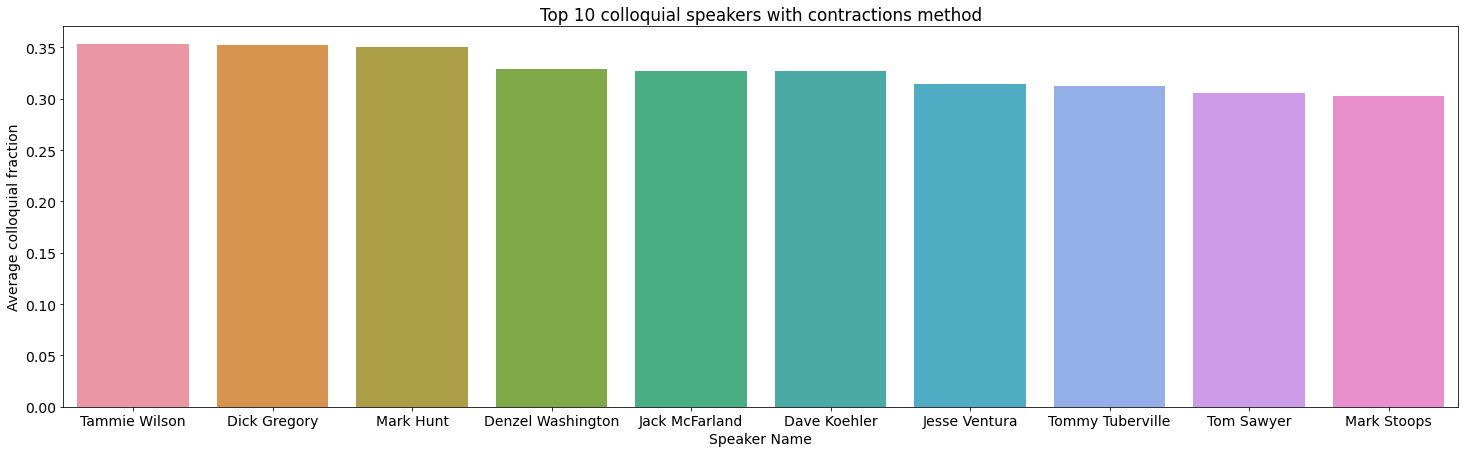

In [137]:
df_plot3=df_aggreg_contractions_filt.reset_index().sort_values(['fraction'], ascending=False)
ax = sns.barplot(x="label", y="fraction", data=df_plot3[:10])
ax.set_title('Top 10 colloquial speakers with contractions method')
ax.set_xlabel('Speaker Name')
ax.set_ylabel('Average colloquial fraction')
path =r'/Users/jules/kDrive/onedrive/Documents_Onedrive/EPFL/MA3/ADA/Project/Figures/'
fig.savefig(path+'polAgrregPlot_top10_contractions.svg',format = 'svg',bbox_inches='tight')
fig.savefig(path+'polAgrregPlot_top10_contractions.png',format = 'png',bbox_inches='tight')

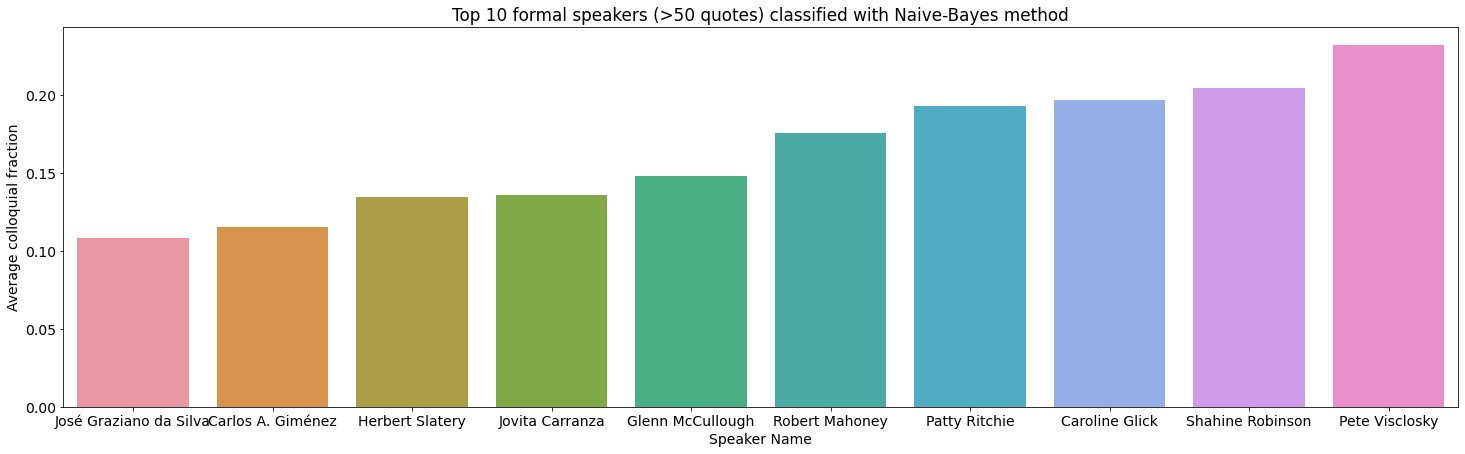

In [138]:
df_plot3=df_aggreg_Naive_filt.reset_index().sort_values(['fraction'], ascending=True)
fig,ax = plt.subplots(1,1)
ax = sns.barplot(x="label", y="fraction", data=df_top10[:10])
ax.set_xlabel('Speaker Name')
ax.set_ylabel('Average colloquial fraction')
ax.set_title('Top 10 formal speakers (>50 quotes) classified with Naive-Bayes method')
path =r'/Users/jules/kDrive/onedrive/Documents_Onedrive/EPFL/MA3/ADA/Project/Figures/'
fig.savefig(path+'polAgrregPlot_top10_formal_Naive.svg',format = 'svg',bbox_inches='tight')
fig.savefig(path+'polAgrregPlot_top10__formal_Naive.png',format = 'png',bbox_inches='tight')

### Plot the repartition in ages

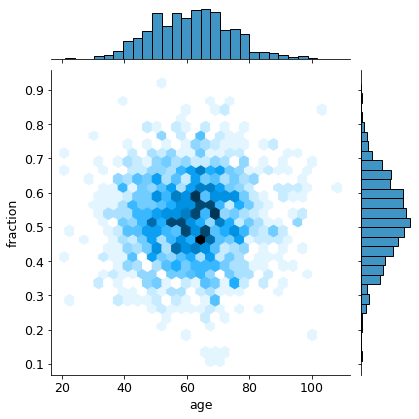

In [88]:
#Remove all politics with fraction equal to 0
sns.jointplot(x=df_plot['age'], y=df_plot['fraction'], kind="hex")

Text(0, 0.5, 'Average fraction of colloquial')

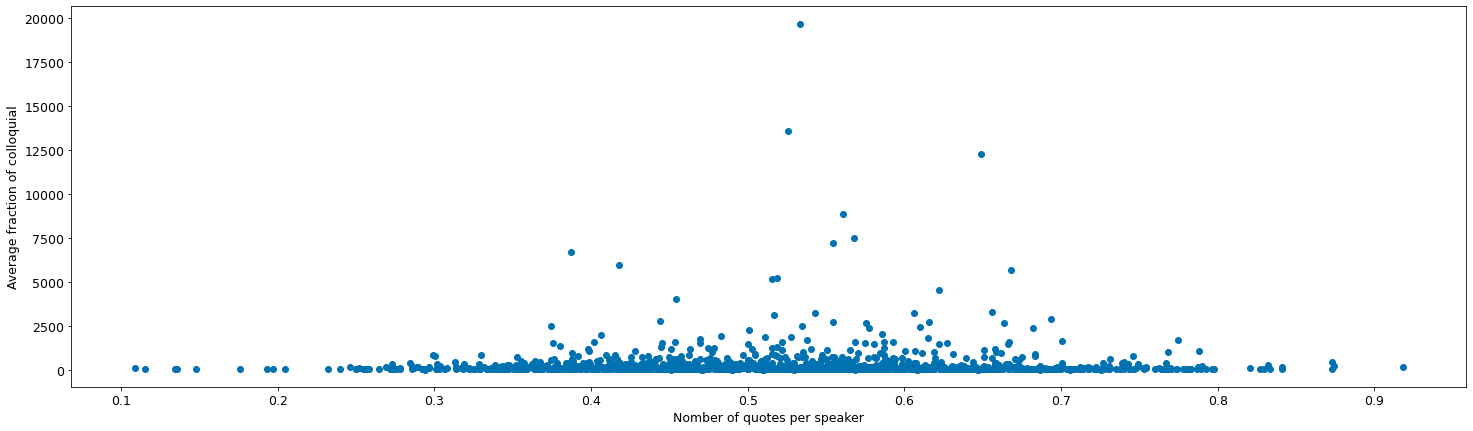

In [90]:
plt.scatter(df_plot['fraction'],df_plot['quotes_number'] )
plt.xlabel('Nomber of quotes per speaker')
plt.ylabel('Average fraction of colloquial')

### Plot the repartition of colloquial between Democrat and Republican 

In [148]:
df_test = df_plot.groupby('bi_party')['fraction'].describe() 
df_test

,count,mean,std,min,25%,50%,75%,max
bi_party,,,,,,,,
Democrat,1398.0,0.324473,0.211659,0.017241,0.128793,0.272078,0.516667,0.918129
Republican,1416.0,0.338500,0.214721,0.000000,0.142857,0.270839,0.532609,0.873984


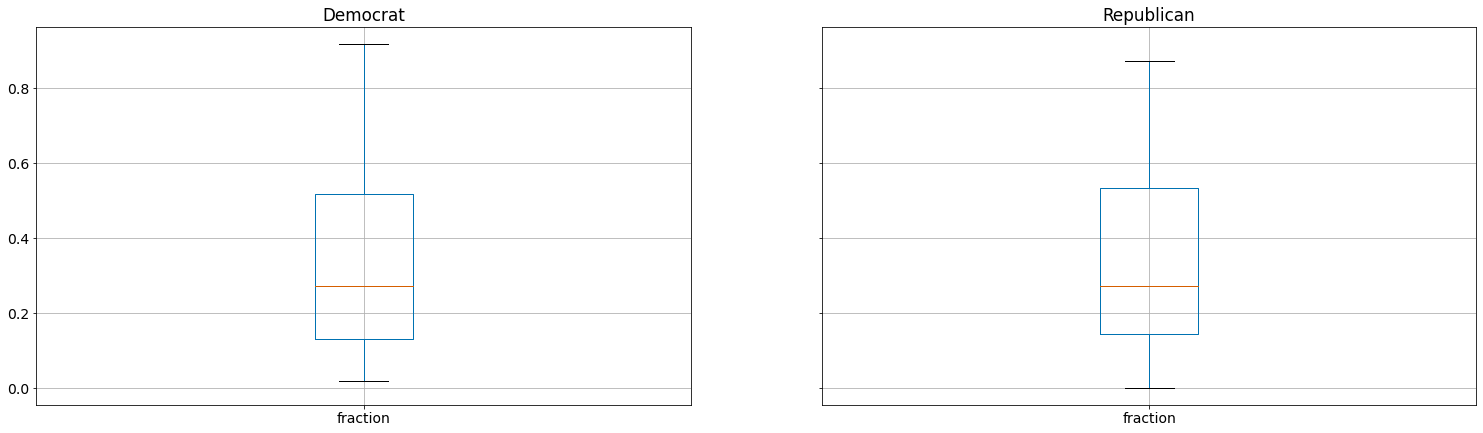

In [170]:
df_test = df_plot.groupby('bi_party').boxplot(column='fraction')
